# Ensemble Learning

## Initial Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import calendar
import datetime

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [4]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

## Read the CSV and Perform Basic Data Cleaning

In [5]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head(-1)

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68811,10000.0,0.0646,306.31,MORTGAGE,98000.0,Source Verified,Jan-2019,low_risk,n,22.41,...,92.1,0.0,0.0,0.0,385928.0,28280.0,48800.0,57128.0,N,N
68812,10000.0,0.1502,346.76,RENT,26000.0,Source Verified,Jan-2019,low_risk,n,9.60,...,80.0,0.0,0.0,0.0,20625.0,6798.0,11300.0,5425.0,N,N
68813,12000.0,0.2727,368.37,RENT,63000.0,Not Verified,Jan-2019,low_risk,n,29.07,...,96.2,0.0,0.0,0.0,87939.0,60350.0,13500.0,62939.0,N,N
68814,5000.0,0.1992,185.62,MORTGAGE,52000.0,Source Verified,Jan-2019,low_risk,n,14.86,...,100.0,0.0,1.0,0.0,30592.0,18611.0,3600.0,18492.0,N,N


## Integer Encoding

### Manual Integer Encoding using datetime

Perform a manual integer encoding of the `Month` column, use a dictionary to map months names with their corresponding numerical value. Omitted year as data is for 2019

In [6]:
df['month'] = pd.DatetimeIndex(df['issue_d']).month
df.drop(columns="issue_d", inplace=True)
df.head(-1)

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,month
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,low_risk,n,27.24,0.0,...,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N,3
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,low_risk,n,20.23,0.0,...,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N,3
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,low_risk,n,24.26,0.0,...,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N,3
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,low_risk,n,31.44,0.0,...,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N,3
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,low_risk,n,18.76,0.0,...,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68811,10000.0,0.0646,306.31,MORTGAGE,98000.0,Source Verified,low_risk,n,22.41,1.0,...,0.0,0.0,0.0,385928.0,28280.0,48800.0,57128.0,N,N,1
68812,10000.0,0.1502,346.76,RENT,26000.0,Source Verified,low_risk,n,9.60,0.0,...,0.0,0.0,0.0,20625.0,6798.0,11300.0,5425.0,N,N,1
68813,12000.0,0.2727,368.37,RENT,63000.0,Not Verified,low_risk,n,29.07,0.0,...,0.0,0.0,0.0,87939.0,60350.0,13500.0,62939.0,N,N,1
68814,5000.0,0.1992,185.62,MORTGAGE,52000.0,Source Verified,low_risk,n,14.86,0.0,...,0.0,1.0,0.0,30592.0,18611.0,3600.0,18492.0,N,N,1


### Encoding Data using `get_dummies()`

Perform a binary encoding on the `Bank`, `State` and `City` columns using the Pandas `get_dummies()` function.

In [7]:
df = pd.get_dummies(df, columns=["home_ownership", "verification_status","hardship_flag","pymnt_plan","initial_list_status","next_pymnt_d","application_type","debt_settlement_flag"])
df.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,verification_status_Verified,hardship_flag_N,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App,debt_settlement_flag_N
0,10500.0,0.1719,375.35,66000.0,low_risk,27.24,0.0,0.0,8.0,0.0,...,0,1,1,0,1,0,1,1,0,1
1,25000.0,0.2000,929.09,105000.0,low_risk,20.23,0.0,0.0,17.0,1.0,...,1,1,1,0,1,0,1,1,0,1
2,20000.0,0.2000,529.88,56000.0,low_risk,24.26,0.0,0.0,8.0,0.0,...,1,1,1,0,1,0,1,1,0,1
3,10000.0,0.1640,353.55,92000.0,low_risk,31.44,0.0,1.0,10.0,1.0,...,1,1,1,0,1,0,1,1,0,1
4,22000.0,0.1474,520.39,52000.0,low_risk,18.76,0.0,1.0,14.0,0.0,...,0,1,1,0,1,0,1,1,0,1


## Split the Data into Training and Testing

In [8]:
# Create our features
X = df.drop(columns="loan_status")

# Create our target
y = df["loan_status"]

In [9]:
X.describe()
#X.head(-1)


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,hardship_flag_N,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App,debt_settlement_flag_N
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.000000,68817.0,68817.0,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,...,0.148001,1.0,1.0,0.123879,0.876121,0.383161,0.616839,0.860340,0.139660,1.0
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,...,0.355104,0.0,0.0,0.329446,0.329446,0.486161,0.486161,0.346637,0.346637,0.0
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,9000.000000,0.088100,265.730000,5.000000e+04,13.890000,0.000000,0.000000,8.000000,0.000000,6293.000000,...,0.000000,1.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,15000.000000,0.118000,404.560000,7.300000e+04,19.760000,0.000000,0.000000,11.000000,0.000000,12068.000000,...,0.000000,1.0,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.0
75%,24000.000000,0.155700,648.100000,1.040000e+05,26.660000,0.000000,1.000000,16.000000,0.000000,21735.000000,...,0.000000,1.0,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0
max,40000.000000,0.308400,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [10]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(51612, 93)

In [11]:
# Check the balance of our target values
Counter(y_train)

Counter({'low_risk': 51366, 'high_risk': 246})

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [12]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [14]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [22]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=1000, random_state=1)
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(n_estimators=1000, random_state=1)

In [26]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = brf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.755188410562291

In [27]:
# Display the confusion matrix
print(confusion_matrix(y_test, y_pred_rf))

[[   62    39]
 [ 1770 15334]]


                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.03      0.61      0.90      0.06      0.74      0.53       101
   low_risk       1.00      0.90      0.61      0.94      0.74      0.57     17104

avg / total       0.99      0.89      0.62      0.94      0.74      0.57     17205



In [28]:
# List the features sorted in descending order by feature importance
importances = brf.feature_importances_

sorted(zip(brf.feature_importances_, X.columns), reverse=True)

[(0.06685785435013118, 'total_rec_prncp'),
 (0.06284919480525715, 'total_pymnt'),
 (0.059341984266355396, 'last_pymnt_amnt'),
 (0.058498731399748226, 'total_rec_int'),
 (0.054180674023065846, 'total_pymnt_inv'),
 (0.031483796247622965, 'int_rate'),
 (0.027008045809484255, 'month'),
 (0.01842276420897128, 'mths_since_recent_inq'),
 (0.0175504062296139, 'installment'),
 (0.017509499351222944, 'dti'),
 (0.016177553785866616, 'max_bal_bc'),
 (0.015788248411705872, 'out_prncp'),
 (0.015774839631839326, 'annual_inc'),
 (0.015479846075155873, 'mo_sin_old_rev_tl_op'),
 (0.015123545977805096, 'revol_bal'),
 (0.015052134028892149, 'mths_since_rcnt_il'),
 (0.014817236597027258, 'avg_cur_bal'),
 (0.014642247995174957, 'out_prncp_inv'),
 (0.014506477533336755, 'total_bc_limit'),
 (0.014157429037279389, 'tot_hi_cred_lim'),
 (0.01403247882040922, 'il_util'),
 (0.013951846546414095, 'mo_sin_old_il_acct'),
 (0.013792701420492676, 'tot_cur_bal'),
 (0.013765385323934884, 'total_bal_il'),
 (0.013760619791


Bad key text.latex.preview in file /Users/nitinprasad/opt/anaconda3/envs/pyvizenv/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/nitinprasad/opt/anaconda3/envs/pyvizenv/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/nitinprasad/opt/anaconda3/envs/pyvizenv/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/sty

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

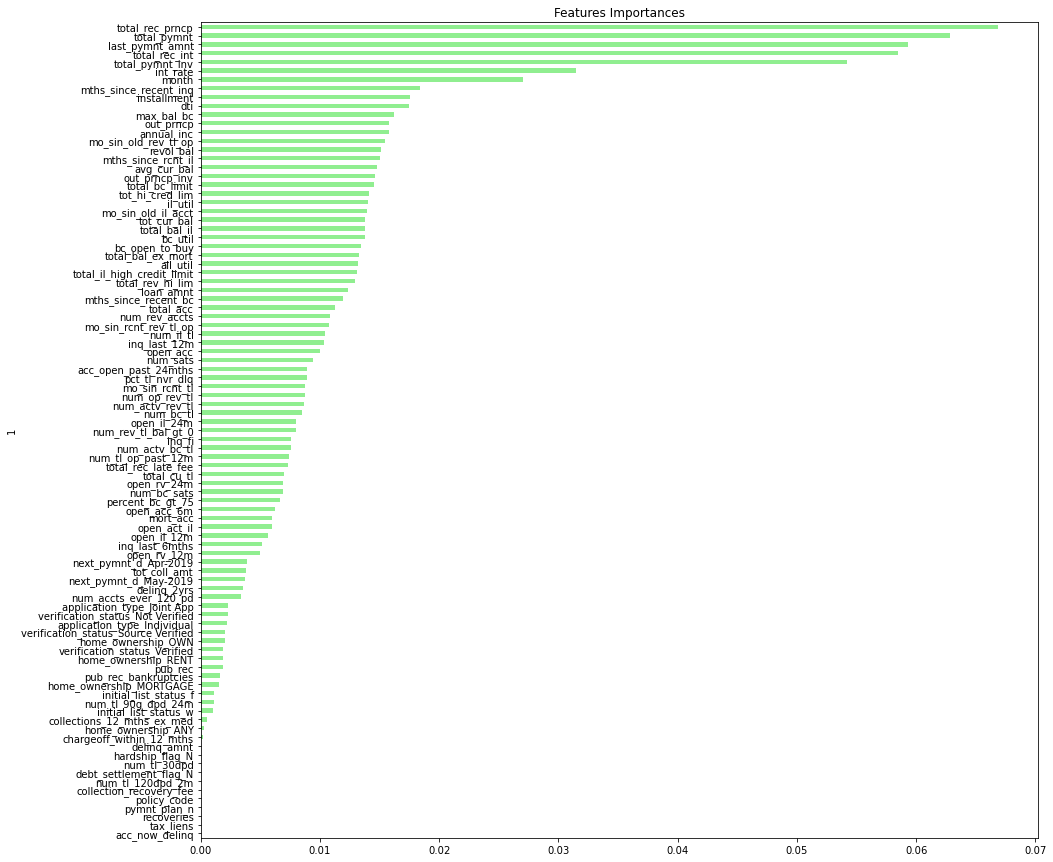

In [29]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(brf.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False,figsize=(15,15))

### Easy Ensemble Classifier

In [35]:
from imblearn.ensemble import EasyEnsembleClassifier 
eec = EasyEnsembleClassifier(random_state=1)
eec.fit(X_train, y_train) 
eec_y_pred = eec.predict(X_test)


In [36]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, eec_y_pred)

0.9063634584927155

In [37]:
# Display the confusion matrix
print(confusion_matrix(y_test, eec_y_pred))

[[   92     9]
 [ 1679 15425]]


In [41]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, eec_y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.05      0.91      0.90      0.10      0.91      0.82       101
   low_risk       1.00      0.90      0.91      0.95      0.91      0.82     17104

avg / total       0.99      0.90      0.91      0.94      0.91      0.82     17205



### Final Questions

1. Which model had the best balanced accuracy score?

        Answer: The Easy Ensemble has a better accuracy score.

        Easy Ensemble Classifier - 0.9063634584927155
        Balanced Random Forest Classifier - 0.755188410562291
</br>
2. Which model had the best recall score?

        Answer: The Easy Ensemble has a better recall score

        Easy Ensemble Classifier - 0.90
        Balanced Random Forest Classifier - 0.89
</br>
3. Which model had the best geometric mean score?

        Answer: The Easy Ensemble has a better geometric mean score

        Easy Ensemble Classifier - 0.91
        Balanced Random Forest Classifier - 0.74
</br>       
4. What are the top three features?

        Answer: The top 3 features in decending order

        (0.06685785435013118, 'total_rec_prncp'),
        (0.06284919480525715, 'total_pymnt'),
        (0.059341984266355396, 'last_pymnt_amnt')